# <center><b><span style='color:#FF9B9B'>Introduction to Transformers</span></b></center>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width="60" height="60"></center>


### <b><span style='color:#FF9B9B'>Credits</span></b>

This notebook is based on the [Pytorch Transformers from Scratch](https://www.youtube.com/watch?v=U0s0f995w14) video by Aladdin Persson and the [How to get meaning from text with language model BERT ](https://www.youtube.com/watch?v=-9vVhYEXeyQ) video by Peltarion.


### <b><span style='color:#FF9B9B'>What will you learn?</span></b>

- The theoretical background on how Transformers work.
- Learn the different components of the Transformer architecture, like the attention mechanism.
- Learn how to code all the different building blocks, like the Encoder block and the Decoder block.

</ol>
</div>

# **Table of Contents**

1. [Environment Set up](#scrollTo=OdG_AgOSqGoE)
2. [Introduction ](#scrollTo=37931510)
    - [2.1 The Transfer Network](#scrollTo=21e5750c)
3. [Transformers Explained Step by Step ](#scrollTo=8d6eb85f)
    - [3.1 Tokenization](#scrollTo=9HC3naD965XJ)
    - [3.2 Embedding](#scrollTo=602pVycS7KMm)
    - [3.3 Context](#scrollTo=K3vI1_iq7fOX)
    - [3.4 Self-Attention Mechanism](#scrollTo=ECVmCsxL7fLh)
    - [3.5 Keys, Queries and Values](#scrollTo=XgM1lrtH7fIN)
    - [3.6 Multi-Head Attention](#scrollTo=FjEDLAKI9EiQ)
    - [3.7 Positional Encoding](#scrollTo=5JW8O0DZ9W_E)
    - [3.8 BERT](#scrollTo=rJrlC2dyAbwt)
4. [Multi-Head Attention](#scrollTo=db805cde)
5. [Encoder Layer](#scrollTo=80d63eb5)
6. [Encoder](#scrollTo=34082e2d)
7. [Decoder Layer](#scrollTo=e3a55d4a)  
8. [Decoder](#scrollTo=0de20e36)
9. [Transformer](#scrollTo=2aee3546)
10. [Example](#scrollTo=3aec56e2)










# <a id="Environment-Set-up"></a>**1. Environment Set up**

[Go back](#scrollTo=zBlPCDnqqynE)



- By running all the cells outlined in this section, it will set up all the required directories where we will execute our NumPy programs.

 The utilized commands are...







1. !pwd-  It is used to print the current working directory
2. %cd-  It is used to change the current working directory
3. %mkdir- It is used to create a new working directory
4. %ls-  is used to list the contents of the current directory

- Finally, we will be in the following path, where code execution begins.
- /home/Deepcept/numpy/playground

# **2. Introduction**
[Go back](#scrollTo=zBlPCDnqqynE)

In this notebook we will:
- First, get the theoretical background of how Transformers work and which are their basic components.
- Second, code all the different blocks of the Transformer architecture to finally build the Transformer.

In this tutorial we will build a Transformer from scratch using PyTorch. To get a better understanding of Transformers these are some good readings and videos:
1. [Transformers from Scratch by Peter Bloem](https://peterbloem.nl/blog/transformers)
2. [Attention is All You Need](https://arxiv.org/pdf/1706.03762.pdf)
3. [How to get meaning from text with language model BERT](https://www.youtube.com/watch?v=-9vVhYEXeyQ)
4. [PyTorch Transformers from Scratch](https://www.youtube.com/watch?v=U0s0f995w14)
5. [GitHub with Transformer code](https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/more_advanced/transformer_from_scratch/transformer_from_scratch.py)
6. [A detailed guide to PyTorch’s nn.Transformer() module](https://towardsdatascience.com/a-detailed-guide-to-pytorchs-nn-transformer-module-c80afbc9ffb1)

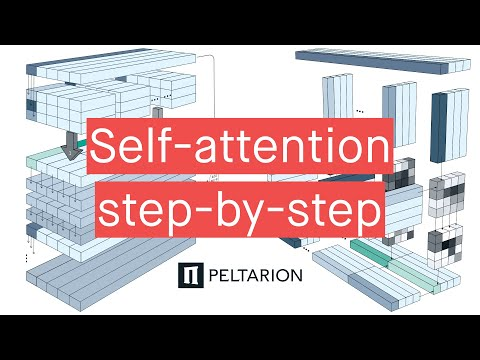

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('-9vVhYEXeyQ', width=800, height=300)

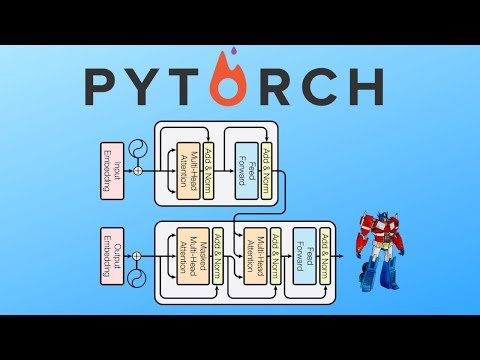

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('U0s0f995w14', width=800, height=300)

### <b><span style='color:#FF9B9B'>2.1 The Transformer Network</span></b>

This is the diagram of the Transformer network presented in the *Attention is All You Need* paper. We will go through all the different pieces of this network throughout this notebook.

<center><img src="https://www.researchgate.net/publication/344197785/figure/fig2/AS:934416989843456@1599793779015/Transformer-model-architecture-described-in-Attention-Is-All-You-Need-6.ppm" width="350"></center>


# **3. Tranformers**
[Go back](#scrollTo=zBlPCDnqqynE)

## **3.1 Tokenization**
[Go back](#scrollTo=zBlPCDnqqynE)

The first step in processing text is to cut it into pieces called **tokens**.  There are many variations of how to do it, and we won’t go into details, but `BERT` uses `WordPiece` tokenization.  This means that tokens correspond roughly to words and punctuation, although a word can also be split into several  tokens if it contains a common prefix or suffix. These are called sub-word tokens and usually contain `##` characters. Words can even be spelled out if they have never been seen before.
<br>
<center><img src="https://i.imgur.com/kCoLZuG.png" width="750"></center>

## **3.2 Embedding**
[Go back](#scrollTo=zBlPCDnqqynE)

The second step is to associate each token  with an **embedding**, which is nothing more than a vector of real numbers. Again, there are many ways to create embedding vectors. Fortunately, already trained embeddings are often provided by research groups, and we can just use an existing dictionary to convert the WordPiece tokens into embedding vectors.
<br>
<center><img src="https://i.imgur.com/NulRCFU.png" width="750"></center>
<br>
The embedding of tokens into vectors is an achievement in itself. The values inside an embedding carry information about the meaning of the token, but they are also arranged in such a way that one can perform mathematical operations on them, which correspond to semantic changes, like changing the gender of a noun, or the tense of a verb, or even the homeland of a city.<br>

<center><img src="https://i.imgur.com/6LtQ1Pd.png" width="750"></center>

## **3.3 Context**
[Go back](#scrollTo=zBlPCDnqqynE)

However, embeddings are associated with tokens by a straight dictionary look-up, which means that the same token always gets the same embedding, regardless of its context. This is where the attention mechanism comes in, and specifically for BERT, the scaled dot-product self-attention. Attention transforms the default embeddings by analyzing the whole sequence of tokens, so that the values are more representative of the token they represent in the context of the sentence.

<center><img src="https://i.imgur.com/oPfudSt.png" width="750"></center>

## **3.4 Self Attention Mechanism**
[Go back](#scrollTo=zBlPCDnqqynE)

Let's have a look at this process with the sequence of tokens `walk`, `by`, `river`, `bank`. Each token is initially replaced by its default embedding, which in this case is a vector with 768 components.
<br>
<center><img src="https://i.imgur.com/HHZDysd.png" width="450"></center>
<br>

Let's color the embedding of the first token to follow what happens to it. We start by calculating the scalar product between pairs of embeddings. Here we have the first embedding with itself. When the two vectors are more correlated, or aligned, meaning that they are generally more similar, the scalar product is higher (darker in image), and we consider that they have a strong relationship. If they had less similar content, the scalar product would be lower (brighter in the image) and we would consider that they don't relate to each other.

<br>
<center><img src="https://i.imgur.com/z3s8TPe.png" width="450"></center>
<br>

We go on and calculate the scalar product for every possible pair of embedding vectors in the input sequence. The values obtained are usually scaled down to avoid getting large values, which improves the numerical behavior. That’s done here by dividing by the square root of 768, which is the size of the vectors.
<br>
<center><img src="https://i.imgur.com/ngHnOUc.png" width="450"></center>
<br>

Then comes the only non-linear operation in the attention mechanism: The scaled values are passed through a softmax activation function, by groups corresponding to each input token. So in this illustration, we apply the softmax column by column. What the softmax does is to exponentially amplify large values, while crushing low and negative values towards zero. It also does normalization, so that each column sums up to 1.

<br>
<center><img src="https://i.imgur.com/pLl50D7.png" width="450"></center>
<br>

Finally, we create a new embedding vector for each token by linear combination of the input embeddings, in proportions given by the softmax results. We can say that the new embedding vectors are contextualized, since they contain a fraction of every input embedding for this particular sequence of tokens. In particular, if a token has a strong relationship with another one, a large fraction of its new contextualized embedding will be made of the related embedding. If a token doesn’t relate much to any other, as measured by the scalar product between their input embeddings, its contextualized embedding will be nearly identical to the input embedding.

<br>
<center><img src="https://i.imgur.com/UPZy2nm.png" width="450"></center>
<br>

For instance, one can imagine that the vector space has a direction that corresponds to the idea of *nature*. The input embeddings of the  tokens `river` and `bank` should both have large values in that direction, so that they are more similar and have a strong relationship. As a result, the new contextualized embeddings of the `river` and `bank` tokens would combine both input embeddings in roughly equal parts. On the other hand, the preposition `by` sounds quite neutral, so that its embedding should have a weak relationship with every other one and little modification of its embedding vector would occur. So there we have the mechanism that lets the scaled dot-product attention utilize context.


To recap:
1. First, it determines how much the  input embedding vectors relate to  each other using the scalar product.
2. The results are then scaled down, and the softmax activation function is applied, which normalizes these results in a non-linear way.
3. New contextualized embeddings are finally created for every token by linear combination of all the input embeddings, using the softmax proportions as coefficients
<br>
<center><img src="https://i.imgur.com/qfFLyND.gif" width="950"></center>
<br>


## **3.5 Keys, Queries and Values**
[Go back](#scrollTo=zBlPCDnqqynE)

However, that's not the whole story. Most importantly, we don't have to use the input embedding vectors as is. We can first project them using 3 linear projections to create the so-called *Key*, *Query*, and *Value* vectors. Typically, the projections are also mapping the input embeddings onto a space of lower dimension. In the case of BERT, the Key, Query, and Value vectors all have 64 components.
<br>
<center><img src="https://i.imgur.com/lIhueb8.png" width="450"></center>
<br>

Each projection can be thought of as focusing on different directions of the vector space, which would represent different semantic aspects. One can imagine that a Key is the projection of an embedding onto the direction of "prepositions", and a Query is the projection of an  embedding along the direction of "locations". In this case, the Key of the token `by` should have a strong relationship with every other Query,  since `by` should have strong components in the direction of "prepositions", and every other token should have strong components in the direction of "locations". The Values can come from yet another projection that is relevant, for example the direction of physical places. It’s these values that are combined to create the contextualized embeddings In practice, the meaning of each projection may not be so clear, and the model is free to learn whatever projections allow it to solve language tasks the most efficiently.

## **3.6 Multi-Head Attention**
[Go back](#scrollTo=zBlPCDnqqynE)

In addition, the same process can be repeated many times with different Key, Query, and Value projections, forming  what is called a **multi-head attention**. Each head can focus on different projections of the input embeddings. For instance, one head could  calculate the preposition/location relationships, while another head could calculate subject/verb relationships, simply by using different projections to create the Key, Query, and Value vectors. The outputs from each head are concatenated back in a large vector. BERT uses 12 such heads, which means that the final output contains one 768-component contextualized embedding vector per token, equally long with the input.
<br>
<center><img src="https://i.imgur.com/pH4NcnC.png" width="450"></center>
<br>

## **3.7 Positional Encoding**
[Go back](#scrollTo=zBlPCDnqqynE)


We can also kickstart the process by adding the input embeddings to **positional embeddings**. Positional embeddings are vectors that contain information about a position in the sequence, rather than about the meaning of a token. This adds information about the sequence even before attention is applied, and it allows attention to calculate relationships knowing the relative order of the tokens.

<br>
<center><img src="https://i.imgur.com/vbCEp1G.png" width="450"></center>
<br>

A detailed explanation of how it works can be found [here](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/), but a quick explanation is that we create a vector for each element representing its position with regard to every other element in the sequence. Positional encoding follows this very complicated-looking formula which, in practice, we won’t really need to understand:

$$\begin{equation}
  p_{i,j} = \left\{
  \begin{array}{@{}ll@{}}
    \sin \left(\frac{1}{10000^{\frac{j}{dim\:embed}}} \right), & \text{if}\ j=even \\
    \cos \left(\frac{1}{10000^{\frac{j}{dim\:embed}}} \right), & \text{if}\ j=odd \\
  \end{array}\right.
\end{equation}
$$

## **3.8 BERT**
[Go back](#scrollTo=zBlPCDnqqynE)

Finally, thanks to the non-linearity introduced by the softmax function, we can achieve even more complex transformations  of the embeddings by applying attention again and again, with a couple of  helpful steps between each application. A complete model like BERT uses 12 layers of  attention, each with its own set of projections So when you search for suggestions for a "walk by the river bank", the computer doesn’t only get a chance to recognize the keyword “river”, but even the numerical values given to “bank” indicate that you’re interested in enjoying the waterside, and not in need of the nearest cash machine.
<br>
<center><img src="https://i.imgur.com/Tn0ddHY.png" width="650"></center>
<br>

# **4. Multi-Head Attention**
[Go back](#scrollTo=zBlPCDnqqynE)

Attention is a mechanism that allows neural networks to assign a different amount of weight or **attention** to each element in a sequence. For text sequences, the elements are token embeddings, where each token is mapped to a vector of some fixed dimension. For example, in BERT each
token is represented as a 768-dimensional vector. The “self” part of self-attention refers to the fact that these weights are computed for
all hidden states in the same set—for example, all the hidden states of the encoder. By contrast, the attention mechanism associated with
recurrent models involves computing the relevance of each encoder hidden state to the decoder hidden state at a given decoding timestep.

The main idea behind self-attention is that instead of using a fixed embedding for each token, we can use the whole sequence to compute a
weighted average of each embedding. Another way to formulate this is to say that given a sequence of token embeddings $x_{1}, x_{2}, ..., x_{n}$, self-attention produces a sequence of new embeddings $x^{'}_{1}, x^{'}_{2}, ..., x^{'}_{n}$ where each $x^{'}_{i}$ is a linear combination of all the $x_{j}$:

$$x^{'}_{i} = \sum^{n}_{j=1} w_{ji} . x_{j}$$

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(MultiHeadAttention, self).__init__()
        """
        MultiHeadAttention mechanism. The input of the MultiHeadAttention mechanism is an embedding (or sequence of embeddings).
        The embeddings are split into different parts and each part is fed into a head.
        :param embed_size: the size of the embedding.
        :param heads: the number of heads you wish to create.
        """
        self.embed_size = embed_size # 512 in Transformer
        self.heads = heads # 8 in Transformer
        self.head_dim = embed_size // heads # 64 in Transformer
        assert (
            self.head_dim * heads == embed_size
        ), "Embedding size needs to be divisible by heads"
        # === Project Embeddings into three vectors: Query, Key and Value ===
        # Note: some implementations do: nn.Linear(embed_size, head_dim). We won't do this. We will project it
        # on a space of size embed_size and then split it into N heads of head_dim shape.
        self.values = nn.Linear(embed_size, embed_size)
        self.keys = nn.Linear(embed_size, embed_size)
        self.queries = nn.Linear(embed_size, embed_size)
        self.fc_out = nn.Linear(embed_size, embed_size)

    def forward(self, values, keys, query, mask):
        # Values, Keys and Queries have size: (batch_size, sequence_len, embedding_size)
        batch_size = query.shape[0]# Get number of training examples/batch size.
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]
        # === Pass through Linear Layer ===
        values = self.values(values)  # (batch_size, value_len, embed_size)
        keys = self.keys(keys)  # (batch_size, key_len, embed_size)
        queries = self.queries(query)  # (batch_size, query_len, embed_size)

        # Split the embedding into self.heads different pieces
        values = values.reshape(batch_size, value_len, self.heads, self.head_dim)
        keys = keys.reshape(batch_size, key_len, self.heads, self.head_dim)
        queries = queries.reshape(batch_size, query_len, self.heads, self.head_dim)

        # Einsum does matrix mult. for query*keys for each training example
        # with every other training example, don't be confused by einsum
        # it's just how I like doing matrix multiplication & bmm

        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        # queries shape: (batch_size, query_len, heads, heads_dim),
        # keys shape: (batch_size, key_len, heads, heads_dim)
        # energy: (batch_size, heads, query_len, key_len)

        # Mask padded indices so their weights become 0
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        # Normalize energy values similarly to seq2seq + attention
        # so that they sum to 1. Also divide by scaling factor for
        # better stability
        attention = torch.softmax(energy / (self.embed_size ** (1 / 2)), dim=3)
        # attention shape: (batch_size, heads, query_len, key_len)
        # values shape: (batch_size, value_len, heads, heads_dim)
        # out after matrix multiply: (batch_size, query_len, heads, head_dim), then
        # we reshape and flatten the last two dimensions.
        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(
            batch_size, query_len, self.heads * self.head_dim
        )
        # Linear layer doesn't modify the shape, final shape will be
        # (batch_size, query_len, embed_size)
        out = self.fc_out(out)
        return out

# **5. Encoder Layer**
[Go back](#scrollTo=zBlPCDnqqynE)

<br>
<center><img style="float:left; margin:20px; padding:20px; max-height:250px" src="https://i.imgur.com/vUOhpoC.png"></center>
<br>

We will be referring to the encoder layer. The encoder layer/block consists of:
1. *Multi-Head Attention*
2. *Add & Norm*
3. *Feed Forward*
4. *Add & Norm* again.

- [nn.LayerNorm()](https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html)
- The `forward_expansion` is a parameter in the "Attention is All You Need" paper which simply adds nodes to the Linear Layer. Since it's used in two different layers in the end it doesn't affect the shape of the output (same as input) it just add some extra computation. Its default value is 4.

In [ ]:
class TransformerLayer(nn.Module):
    def __init__(self, embed_size, heads, dropout, forward_expansion=4):
        super(TransformerLayer, self).__init__()
        self.attention = MultiHeadAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_size, forward_expansion * embed_size),
            nn.ReLU(),
            nn.Linear(forward_expansion * embed_size, embed_size),
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, value, key, query, mask):
        # Values, Keys and Queries have size: (batch_size, query_len, embedding_size)
        attention = self.attention(value, key, query, mask) # attention shape: (batch_size, query_len, embedding_size)
        # Add skip connection, run through normalization and finally dropout
        x = self.dropout(self.norm1(attention + query)) # x shape: (batch_size, query_len, embedding_size)
        forward = self.feed_forward(x) # forward shape: (batch_size, query_len, embedding_size)
        out = self.dropout(self.norm2(forward + x)) # out shape: (batch_size, query_len, embedding_size)
        return out

# **6. Encoder**
[Go back](#scrollTo=zBlPCDnqqynE)

<br>
<center><img style="float:left; margin:20px; padding:20px; max-height:250px" src="https://i.imgur.com/rbEe0lW.png"></center>
<br>

We will be referring to the transformer block. The transformer block consists of:
1. *Embedding*
2. *Positional Encoding*
3. *Transformer Block*

In [ ]:
class Encoder(nn.Module):
    def __init__(self, src_vocab_size, embed_size, num_layers, heads,
        device, forward_expansion, dropout, max_length):
        super(Encoder, self).__init__()
        self.embed_size = embed_size # size of the input embedding
        self.device = device # either "cuda" or "cpu"
        # Lookup table with an embedding for each word in the vocabulary
        self.word_embedding = nn.Embedding(src_vocab_size, embed_size)
        # Lookup table with a positional embedding for each word in the sequence
        self.position_embedding = nn.Embedding(max_length, embed_size)
        self.layers = nn.ModuleList(
            [
                TransformerLayer(
                    embed_size,
                    heads,
                    dropout=dropout,
                    forward_expansion=forward_expansion,
                )
                for _ in range(num_layers)
            ]
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask):
        """
        Forward pass.
        :param x: source sequence. Shape: (batch_size, source_sequence_len).
        :param mask: source mask is used when we need to pad the input.
        :return output: torch tensor of shape (batch_size, src_sequence_length, embedding_size)
        """
        batch_size, seq_length = x.shape
        # positions is an arange from (0,seq_len), e.g: torch.tensor([[0,1,2,...,N], [0,1,2,...,N], ..., [0,1,2,...,N]])
        positions = torch.arange(0, seq_length).expand(batch_size, seq_length).to(self.device)
        out = self.dropout((self.word_embedding(x) + self.position_embedding(positions)))
        # In the Encoder the query, key, value are all the same, in the
        # decoder this will change. This might look a bit odd in this case.
        for layer in self.layers:
            out = layer(out, out, out, mask)
        # output shape: torch.Size([batch_size, sequence_length, embedding_size])
        return out

# **7. Decoder Layer**
[Go back](#scrollTo=zBlPCDnqqynE)

<br>
<center><img style="float:left; margin:20px; padding:20px; max-height:250px" src="https://i.imgur.com/yV18zvn.png"></center>
<br>

We will be referring to the decoder layer. The decoder layer/block consists of:
1. *Masked Multi-Head Attention*
2. *Add & Norm*
3. *Masked Multi-Head Attention*
4. *Add & Norm*
5. *Feed Forward*
6. *Add & Norm*


In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, embed_size, heads, forward_expansion, dropout, device):
        super(DecoderLayer, self).__init__()
        self.norm = nn.LayerNorm(embed_size)
        self.attention = MultiHeadAttention(embed_size, heads=heads)
        self.transformer_block = TransformerLayer(
            embed_size, heads, dropout, forward_expansion
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, value, key, src_mask, trg_mask):
        """
        :param x: target input. Shape: (batch_size, target_sequence_len, embedding_size)
        :param value: value extracted from encoder.
        :param key: key extracted from encoder.
        :param src_mask: source mask is used when we need to pad the input.
        :param trg_mask: target mask is used to pass one element of the target at a time.
        """

        attention = self.attention(x, x, x, trg_mask)
        query = self.dropout(self.norm(attention + x))
        out = self.transformer_block(value, key, query, src_mask)
        return out

# **8. Decoder**
[Go back](#scrollTo=zBlPCDnqqynE)

<br>
<center><img style="float:left; margin:20px; padding:20px; max-height:350px" src="https://i.imgur.com/jPMFhIK.png"></center>
<br>

We will be referring to the decoder. The decoder consists of:
1. *Output Embedding*
2. *Decoder Block*
3. *Linear*
4. *Softmax*

**Notes:**

- In this implementation the Token Embeddings are learned. Normally, we would use the output of the model's tokenizer.
- In this implementation the Positional Embedding are learned. We don't use the formula.


In [ ]:
class Decoder(nn.Module):
    def __init__(self, trg_vocab_size, embed_size, num_layers, heads, forward_expansion,
        dropout, device, max_length):
        """
        :param trg_vocab_size: number of unique tokens in target vocabulary.
        :param embed_size: size of output embeddings.
        :param num_layers: number of DecoderLayers in the Decoder.
        :param heads: number of heads in the MultiAttentionHeads inside the DecoderLayer.
        :param forward_expansion: expansion factor in LinearLayer at the end of the TransformerLayer.
        :param dropout: dropout probability.
        :param device: either "cuda" or "cpu".
        :param max_length: maximum length of sequence.
        """
        super(Decoder, self).__init__()
        self.device = device
        #=== For each token in target vocab there is a token embedding ===
        self.word_embedding = nn.Embedding(trg_vocab_size, embed_size)
        self.position_embedding = nn.Embedding(max_length, embed_size)
        self.layers = nn.ModuleList(
            [
                DecoderLayer(embed_size, heads, forward_expansion, dropout, device)
                for _ in range(num_layers)
            ]
        )
        self.fc_out = nn.Linear(embed_size, trg_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_out, src_mask, trg_mask):
        """
        :param x: target sequence. Shape: (batch_size, target_sequence_len)
        :param enc_out: encoder output. Shape: (batch_size, src_sequence_length, embedding_size)
        :param src_mask: source mask.
        :param trg_mask: target mask.
        """
        batch_size, seq_length = x.shape # x shape: (batch_size, target_sequence_len)
        # positions is an arange from (0,seq_len), e.g: torch.tensor([[0,1,2,...,N], [0,1,2,...,N], ..., [0,1,2,...,N]])
        positions = torch.arange(0, seq_length).expand(batch_size, seq_length).to(self.device) # positions shape: (batch_size, target_sequence_len)
        x = self.dropout((self.word_embedding(x) + self.position_embedding(positions)))

        for layer in self.layers:
            x = layer(x, enc_out, enc_out, src_mask, trg_mask)

        out = self.fc_out(x)
        return out

# **9. Transformer**
[Go back](#scrollTo=zBlPCDnqqynE)

<br>
<center><img src="https://production-media.paperswithcode.com/methods/new_ModalNet-21.jpg" width=350></center>
<br>


In [ ]:
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, trg_vocab_size, src_pad_idx, trg_pad_idx, embed_size=512,
                 num_layers=6, forward_expansion=4, heads=8, dropout=0, device="cpu", max_length=100):

        super(Transformer, self).__init__()
        # === Encoder ===
        self.encoder = Encoder(src_vocab_size, embed_size, num_layers, heads, device, forward_expansion, dropout, max_length)
        # === Decoder ===
        self.decoder = Decoder(trg_vocab_size, embed_size, num_layers, heads, forward_expansion, dropout, device, max_length)
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device

    def make_src_mask(self, src):
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
        # (N, 1, 1, src_len)
        return src_mask.to(self.device)

    def make_trg_mask(self, trg):
        """
        Returns a lower triangular matrix filled with 1s. The shape of the mask is (target_size, target_size).
        Example: for a target of shape (batch_size=1, target_size=4)
        tensor([[[[1., 0., 0., 0.],
                  [1., 1., 0., 0.],
                  [1., 1., 1., 0.],
                  [1., 1., 1., 1.]]]])
        """
        N, trg_len = trg.shape
        trg_mask = torch.tril(torch.ones((trg_len, trg_len))).expand(
            N, 1, trg_len, trg_len
        )
        return trg_mask.to(self.device)

    def forward(self, src, trg):
        src_mask = self.make_src_mask(src) # src_mask shape:
        trg_mask = self.make_trg_mask(trg) # trg_mask shape:
        enc_src = self.encoder(src, src_mask) # enc_src shape:
        out = self.decoder(trg, enc_src, src_mask, trg_mask) # out shape:
        return out

# **10. Example**
[Go back](#scrollTo=zBlPCDnqqynE)


In [ ]:
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    x = torch.tensor([[1, 5, 6, 4, 3, 9, 5, 2, 0], [1, 8, 7, 3, 4, 5, 6, 7, 2]]).to(device)
    trg = torch.tensor([[1, 7, 4, 3, 5, 9, 2, 0], [1, 5, 6, 2, 4, 7, 6, 2]]).to(device)
    src_pad_idx = 0 # index of the padding token in source vocabulary
    trg_pad_idx = 0 # index of the padding token in target vocabulary
    src_vocab_size = 10 # number of unique tokens in source vocabulary
    trg_vocab_size = 10 # number of unique tokens in target vocabulary

    print(f"Input shape: {x.shape}")
    print(f"Target shape: {trg.shape}")
    print(f"Device available: {device}")

    model = Transformer(src_vocab_size, trg_vocab_size, src_pad_idx, trg_pad_idx, device=device).to(device)
    out = model(x, trg[:, :-1])
    print(f"Output shape: {out.shape}")
    print(f"Output: {out}")

Input shape: torch.Size([2, 9])
Target shape: torch.Size([2, 8])
Device available: cpu
Output shape: torch.Size([2, 7, 10])
Output: tensor([[[-1.1367, -0.6408,  0.1772, -0.2633, -0.2638, -0.9043,  0.9024,
           0.3339,  0.2707,  0.0531],
         [-0.7394, -0.6557,  0.1851, -0.1387, -0.3566, -0.3275,  1.1227,
           0.3852, -0.5156,  0.2880],
         [-0.6410, -0.7097, -0.2116, -0.2914, -0.9905, -1.0079,  1.2349,
           0.4540, -0.6406,  0.0375],
         [-1.0375, -0.6948, -0.2632,  0.5691, -0.2072, -0.1662,  0.0938,
           0.4615, -1.0084,  0.6491],
         [-0.4221, -0.6208, -0.7092, -0.6520, -1.2705, -0.6535,  1.1210,
          -0.4472, -0.8092, -0.6689],
         [-0.2721, -1.3016,  0.2503,  0.0051, -0.8524, -1.0297,  0.6896,
           0.6333, -0.3871, -0.0944],
         [-0.8829, -0.7384,  0.0606, -0.1568, -0.4178,  0.0184,  0.6498,
           0.6891, -0.3586, -0.3387]],

        [[-1.0717, -0.5657,  0.0641, -0.2481, -0.2739, -1.1142,  0.9179,
           0.243